# **NAIVE BAYES ALGORITHM**

**TYPES OF NAIVE BAYES ALGORITHM**

**Gaussian Naive Bayes :** This type of Naive Bayes is used when variables are continuous in nature. It assumes that all the variables have a normal distribution. So if you have some variables which do not have this property, you might want to transform them to the features having distribution normal. The normal distribution has several key features alid properties that define it.


First, Its mean (average), median (midpoint), and mode (most frequent observation) are all equal to one another.

**Normal distribution**, also known as the **Gaussian distribution**, is a probability distribution that is symmetric about the mean, showing that data near the mean are more frequent in occurrence than data far from the mean. In a normal distribution the mean is zero and the standard deviation is 1.

All kinds of variables in natural and social sciences are normally or approximately normally distributed. Height, birth weight, reading ability, job satisfaction, or SAT scores are just a few examples of such variables.



**Multinomial Naive Bayes :** Suppose you have a text document and you extract all the unique words and create multiple features where each feature represents the count of the word in the document. In such a case, whave a frequency as a feature. In such a scenario, we use multinomial Naive Bayes.




**Bemoulli Naive Bayes :** This is used when features are binary. So, instead of using the frequency of the word, if you have discrete features in 1s and Os that represent the presence or absence of a feature. In that case, the features will be binary and we will use Bernoulli Naive Bayes.



In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('/content/drive/MyDrive/DATA SCIENCE/Machine Learning/MACHINE LEARNING ALGORITHMS/NAIVE BAYES ALGORITHM/Copy of diabetes (1) (2) (1) (1) (1) (1).csv')

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.shape

(768, 9)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
data.isna().any()

,0
Pregnancies,False
Glucose,False
BloodPressure,False
SkinThickness,False
Insulin,False
BMI,False
DiabetesPedigreeFunction,False
Age,False
Outcome,False


In [7]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
corr_matrix = data.corr()['Outcome']
corr_matrix

,Outcome
Pregnancies,0.221898
Glucose,0.466581
BloodPressure,0.065068
SkinThickness,0.074752
Insulin,0.130548
BMI,0.292695
DiabetesPedigreeFunction,0.173844
Age,0.238356
Outcome,1.000000


In [9]:
data = data.drop_duplicates()

In [10]:
data.shape

(768, 9)

In [11]:
x = data.iloc[:,0:8]
y = data['Outcome']

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=2)

In [13]:
y_train.value_counts()

,count
Outcome,
0,391
1,223


In [14]:
# model with implementation of SMOTE
# SMOTE - for data balancing - Synthetic Minority Over-sampling Technique

from imblearn.over_sampling import SMOTE

sm = SMOTE()

In [15]:
x_res,y_res = sm.fit_resample(x_train,y_train)

In [16]:
y_res.value_counts()

,count
Outcome,
0,391
1,391


In [17]:
from sklearn.preprocessing import StandardScaler
sd = StandardScaler()
x_test = sd.fit_transform(x_test)
x_train = sd.transform(x_train)
x_res = sd.fit_transform(x_res)


In [18]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train,y_train)

y_pred = nb.predict(x_test)
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0])

In [23]:
from sklearn.metrics import accuracy_score, confusion_matrix

score = accuracy_score(y_test,y_pred)

score

0.7597402597402597

In [24]:
conf_metc = confusion_matrix(y_test,y_pred)
conf_metc

array([[93, 16],
       [21, 24]])

In [25]:
from sklearn.metrics import mean_squared_error, precision_score, recall_score

msc = mean_squared_error(y_test,y_pred)
print('MSC : ',msc)

MSC :  0.24025974025974026


In [27]:
precision = precision_score(y_test,y_pred, average = 'binary')
print('Precision : %3f'% precision)

Precision : 0.600000


In [28]:
recall = recall_score(y_test,y_pred, average = 'binary')
print('Recall : %3f'% recall)

Recall : 0.533333


In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
labels = ['Yes','No']
cm = confusion_matrix(y_test,y_pred)


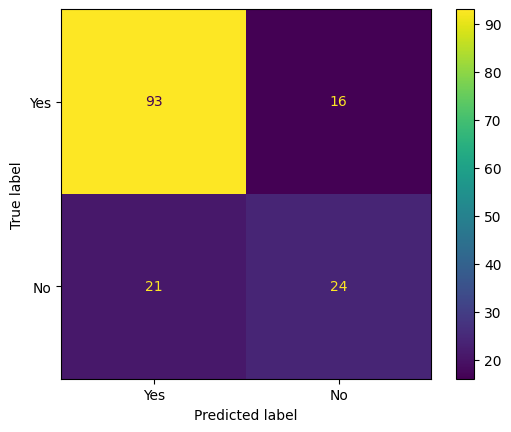

In [30]:
cmd = ConfusionMatrixDisplay(cm,display_labels=labels)
cmd.plot()

In [32]:
from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
y_pred

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0])

In [33]:
from sklearn import metrics
metrics.accuracy_score(y_test,y_pred)


0.6883116883116883

In [ ]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
y_pred